#📌 Extracción

## Carga del archivo en ambiente de trabajo

In [32]:
# Antes de ejectuar el notebook:
# SUBIR EL ARCHIVO "clientes_sin_faltante.csv" al ambiente de trabajo usado para proyectar el modelo
# SUBIR EL ARCHIVO "prueba_nuevos_clientes.csv" al ambiente de trabajo usado para probar el modelo
url = '/content/clientes_sin_faltante.csv'
url1 = '/content/prueba_nuevos_clientes.csv'

In [33]:
import pandas as pd
datos = pd.read_csv(url,sep=';')
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,656,5933
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,599,5424
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,739,28085
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,980,123785
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,839,2674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,5515,7429
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,851,18737
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,503,9275
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,6785,462765


In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   Churn             7043 non-null   object
 2   gender            7043 non-null   object
 3   SeniorCitizen     7043 non-null   int64 
 4   Partner           7043 non-null   object
 5   Dependents        7043 non-null   object
 6   tenure            7043 non-null   int64 
 7   PhoneService      7043 non-null   object
 8   MultipleLines     7043 non-null   object
 9   InternetService   7043 non-null   object
 10  OnlineSecurity    7043 non-null   object
 11  OnlineBackup      7043 non-null   object
 12  DeviceProtection  7043 non-null   object
 13  TechSupport       7043 non-null   object
 14  StreamingTV       7043 non-null   object
 15  StreamingMovies   7043 non-null   object
 16  Contract          7043 non-null   object
 17  PaperlessBilli

#🔧 Transformación

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
datos = datos.drop(columns=["customerID"])  # Elimino ID por no aportar valor predictivo

datos_transf = pd.DataFrame() # Creo un nuevo DataFrame para no modificar el original

In [37]:
for column in datos.columns:
  if datos[column].dtype == "object":
    datos[column] = datos[column].fillna("Missing")
    le = LabelEncoder()
    datos_transf[column] = le.fit_transform(datos[column])

In [38]:
datos_transf

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,1,1,0,0,0,2,0,2,2,0,1,1,3
1,0,1,0,0,1,2,0,0,0,0,0,0,2,0,0,3
2,1,1,0,0,1,0,1,0,0,2,0,0,0,0,1,2
3,1,1,1,0,1,0,1,0,2,2,0,2,2,0,1,2
4,1,0,1,0,1,0,1,0,0,0,2,2,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,2,0,0,2,0,0,1,0,3
7039,1,1,1,0,1,2,1,0,0,0,0,0,2,0,1,2
7040,0,1,0,0,1,0,0,0,2,0,0,0,0,0,1,3
7041,0,1,1,1,1,0,0,2,0,2,2,0,2,2,0,3


In [39]:
X = datos_transf.drop("Churn", axis=1)
y = datos_transf["Churn"]  # 1=Abandonó, 0=No Abandonó

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1960)

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=1960)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1960)

In [41]:
y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.7665010645848119

Matriz de Confusión:
 [[909 131]
 [198 171]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1040
           1       0.57      0.46      0.51       369

    accuracy                           0.77      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



## Mejorar parametros

In [42]:
from sklearn.model_selection import GridSearchCV

# Grilla de hiperparámetros
param_grid = {
  'n_estimators': [100, 200],
  'max_depth': [None, 10, 20],
  'min_samples_split': [2, 5],
  'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
  estimator=RandomForestClassifier(random_state=1960),
  param_grid=param_grid,
  cv=5,
  scoring='accuracy',
  n_jobs=-1,
  verbose=1
)

# Ajuste de datos de entrenamiento
grid_search.fit(X_train, y_train)

# Seleccion del mejor modelo
best_model = grid_search.best_estimator_

print("Mejores parámetros:", grid_search.best_params_)
print("Precisión del test:", best_model.score(X_test, y_test))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Precisión del test: 0.7970191625266146


## Grafico

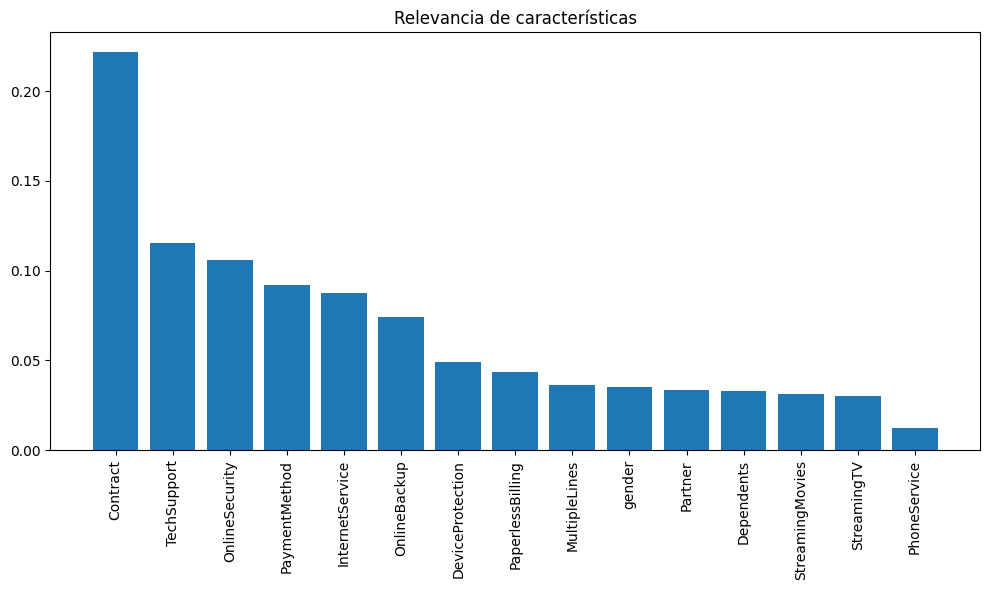

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Relevancia de variables
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Relevancia de características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.savefig("grafico de barras.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

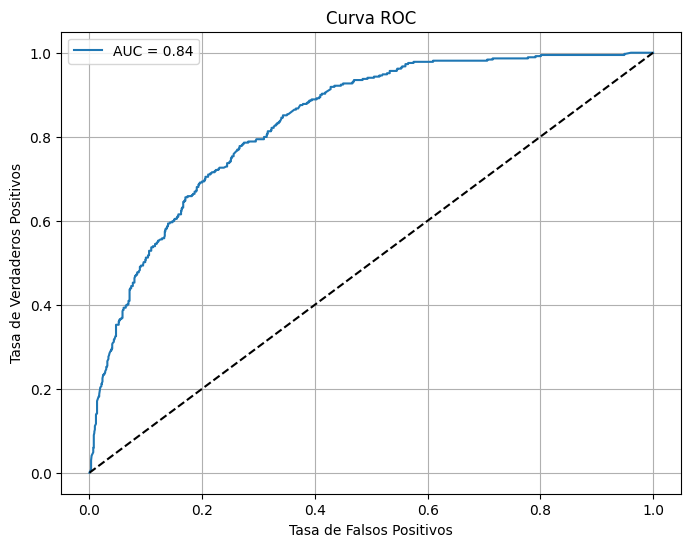

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades predichas
y_probs = best_model.predict_proba(X_test)[:, 1]  # Solo la clase positiva

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal aleatoria
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.savefig("curva ROC.png", dpi=300, bbox_inches='tight')
plt.grid();

## Guardar el modelo

In [45]:
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=1960)

In [46]:
import pickle

try:
  with open('champion.pkl','wb') as file:
    pickle.dump(best_model,file)
  print('✅ Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))


✅ Modelo serializado con éxito


In [47]:
import joblib

# Mejor Modelo
champion_model = best_model

# Columnas esperadas
columnas_modelo = X.columns.tolist()

modelo_guardado = {
    "modelo": champion_model,
    "columnas": columnas_modelo,
}

# Guardar todo junto
joblib.dump(modelo_guardado, "modelo_champion.pkl")
print("✅ Modelo champion guardado exitosamente.")

✅ Modelo champion guardado exitosamente.


## Probando el modelo

In [48]:
# Simulando un nuevo cliente
nuevo_cliente = pd.DataFrame([{
    "gender": "Male",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "DSL",
    "OnlineSecurity": "Yes",
    "OnlineBackup": "No",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges.Monthly": 70.5,
    "Charges.Total": 820.1
}])

In [49]:
nuevo_cliente

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Male,0,Yes,No,12,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,70.5,820.1


In [50]:
from sklearn.preprocessing import LabelEncoder

for col in nuevo_cliente.columns:
  if nuevo_cliente[col].dtype == "object":
    nuevo_cliente[col] = LabelEncoder().fit_transform(nuevo_cliente[col])
nuevo_cliente

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,70.5,820.1


In [51]:
import pickle
# Cargar el modelo desde el archivo .pkl
with open('champion.pkl', 'rb') as file:
  modelo = pickle.load(file)

modelo

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=1960)

In [52]:
import joblib

# Cargar el diccionario que contiene el modelo y otros objetos
modelo_data = joblib.load("modelo_champion.pkl")

In [53]:
modelo = modelo_data["modelo"]
columnas = modelo_data["columnas"]

In [54]:
nuevo_cliente = nuevo_cliente[columnas]

# Hacer predicción
pred = modelo.predict(nuevo_cliente)[0]
prob = modelo.predict_proba(nuevo_cliente)[0][1]

print("📌 ¿Abandonará el servicio?:", "Sí" if pred == 1 else "No")
print("🔮 Probabilidad de Abandonar el Servicio:", round(prob * 100, 2), "%")

📌 ¿Abandonará el servicio?: No
🔮 Probabilidad de Abandonar el Servicio: 29.63 %


In [55]:
# Prueba del modelo con 10 clientes simulados

prueba_nuevos_clientes = pd.read_csv(url1,sep=';')
df_original = prueba_nuevos_clientes.copy()
customerID = prueba_nuevos_clientes["customerID"]
prueba_nuevos_clientes = prueba_nuevos_clientes[columnas]
prueba_nuevos_clientes

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic)
1,Male,No,No,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check
2,Female,No,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic)
3,Male,Yes,No,No,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check
4,Female,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check
5,Male,No,Yes,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,Yes,Credit card (automatic)
6,Female,Yes,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check
7,Male,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Two year,Yes,Credit card (automatic)
8,Male,Yes,No,No,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Electronic check
9,Female,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check


In [56]:
for col in prueba_nuevos_clientes.columns:
  if prueba_nuevos_clientes[col].dtype == "object":
    prueba_nuevos_clientes[col] = LabelEncoder().fit_transform(prueba_nuevos_clientes[col])
prueba_nuevos_clientes

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0
1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,2
2,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0
3,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2
5,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0
6,0,1,0,0,0,1,1,1,1,0,1,1,2,1,1
7,1,1,0,1,1,0,1,0,0,0,0,0,2,1,0
8,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1
9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2


In [57]:
# Clonar el DataFrame por seguridad
df = prueba_nuevos_clientes.copy()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

# Reordenar columnas según las que espera el modelo
df = df[columnas]

In [58]:
# Predicción binaria (0 o 1)
predicciones = modelo.predict(df)

# Probabilidad de Abandono (segunda columna del predict_proba)
probabilidades = modelo.predict_proba(df)[:, 1]

# Agregar resultados al DataFrame original
prueba_nuevos_clientes["Predicción"] = ["Sí" if p == 1 else "No" for p in predicciones]
prueba_nuevos_clientes["Probabilidad (%)"] = (probabilidades * 100).round(2)

# Agregar customerID para la impresion
prueba_nuevos_clientes["customerID"] = df_original["customerID"].values

prueba_nuevos_clientes

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Predicción,Probabilidad (%),customerID
0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,0,No,18.64,0001-AAAAA
1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,2,Sí,50.40,0002-BBBBB
2,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,No,43.17,0003-CCCCC
3,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1,No,13.89,0004-DDDDD
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,No,42.19,0005-EEEEE
5,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,No,13.61,0006-FFFFF
6,0,1,0,0,0,1,1,1,1,0,1,1,2,1,1,No,10.56,0007-GGGGG
7,1,1,0,1,1,0,1,0,0,0,0,0,2,1,0,No,7.76,0008-HHHHH
8,1,1,0,0,1,1,1,0,1,0,1,1,2,1,1,No,13.89,0009-IIIII
9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,No,42.19,0010-JJJJJ


In [59]:
# Aseguramos que customerID tenga el mismo largo y orden que prueba_nuevos_clientes
prueba_nuevos_clientes["customerID"] = customerID.values

# Ordenamos por probabilidad descendente
prueba_nuevos_clientes.sort_values("Probabilidad (%)", ascending=False, inplace=True)

# Mostramos los primeros 10 con más riesgo incluyendo customerID
print(prueba_nuevos_clientes[["customerID", "Predicción", "Probabilidad (%)"]].head(10))

   customerID Predicción  Probabilidad (%)
1  0002-BBBBB         Sí             50.40
2  0003-CCCCC         No             43.17
9  0010-JJJJJ         No             42.19
4  0005-EEEEE         No             42.19
0  0001-AAAAA         No             18.64
3  0004-DDDDD         No             13.89
8  0009-IIIII         No             13.89
5  0006-FFFFF         No             13.61
6  0007-GGGGG         No             10.56
7  0008-HHHHH         No              7.76


# **Informe Final**
#**Modelo de Predicción de Abandono de Clientes (Churn)**

##**1. Introducción**

**Objetivo:** Retener y fidelizar los clientes es un factor estratégico para la rentabilidad de las empresas, en este caso de servicios como las telecomunicaciones.
El objetivo de este proyecto es desarrollar un modelo de Machine Learning que nos permita predecir la probabilidad de forma anticipada de que un cliente abandone el servicio, para de esta forma poder implementar estrategias para su retención.

##**2. Descripción del Conjunto de Datos (Dataset)**

•	Origen: Base de datos interna con información de clientes de telecomunicaciones.

•	Tamaño: 7.000 registros × 21 columnas.

•	Variable objetivo: Churn (Sí/No)

•	Variables predictoras: Incluyen características demográficas (género, edad,
dependientes), contractuales (tipo de contrato, método de pago), servicios (Internet, Streaming, Seguridad) y variables económicas (cargos mensuales, cargos totales).

##**3. Preprocesamiento de los datos**

Los datos provenian de una fuente conocida y confiable, y la base ya estaba limpia y sin inconsistencias.

•	Eliminación de campos irrelevantes (customerID).

•	Conversión de variables categóricas usando LabelEncoder.

•	División de datos en entrenamiento y testeo (80/20).

•	Normalización no requerida por el modelo Random Forest.

•	Fijamos el estado random en 1960 para poder repetir el experimento con los mismos valores.

##**4. Selección del Modelo**

•	Modelo seleccionado: RandomForestClassifier

##**5. Interpretación de Resultados**

 Curva ROC:

•	Importante área bajo la curva indica una alta capacidad de discriminación entre los clientes que abandonan y los que no.

Importancia de variables (top 5):
1.	Contract
2.	TechSupport
3.	OnlineSecurity
4.	PaymenMethod
5.	InternetService

##**6. Aplicación del Modelo**

Predicción sobre nuevos clientes:
•	Se desarrolló un módulo que permite evaluar listas de clientes almacenadas en un archivo csv, en este caso llamado “prueba_nuevos_clientes.csv”

•	Se lista por cliente:

*	Identificador (customerID)

*	Predicción (Sí o No)

*	Probabilidad estimada de churn (porcentaje)

##**7. Exportación del Modelo**

El modelo se exporto en formato “.pkl” utilizando “joblib”, junto con las columnas esperadas para facilitar la reutilización. El archivo se llama “modelo_champion.pkl”.

#**8. Confiabilidad del modelo**

El modelo ha mostrado resultados consistentes con los datos disponibles y considero recomendable aplicarlo en campañas de retención dirigidas a clientes con alta probabilidad de churn (>70%).

##**9. Recomendaciones**

1.	Monitorear el desempeño periódicamente con nuevos datos.

2.	Incorporar más variables externas, como satisfacción del cliente, cantidad de llamadas al centro de ayuda, historial de reclamos, etc.

##**10. Conclusión**

El modelo ofrece una herramienta potente y accesible para anticipar el abandono de clientes. La integración del mismo a procesos de negocio, permitirá aumentar la eficacia de las estrategias de fidelización, reducir pérdidas y mejorar la experiencia del cliente.


*Informe final elaborado por Gustavo Daniel Franzetti.-*